In [36]:
import random
import matplotlib.pyplot as plt
import numpy as np
from deap import tools,base,creator,algorithms
import time

gen	nevals	avg    	min   
0  	500   	1160.62	31.988
1  	368   	1137.3 	28.1352
2  	367   	1129.83	28.0198
3  	385   	1124.69	30.6094
4  	372   	1123.46	29.4707
5  	393   	1117.96	29.4375
6  	365   	1112.59	31.5749
7  	382   	1114.93	28.4412
8  	385   	1120.26	28.0664
9  	375   	1118.32	31.8452
10 	387   	1119.38	28.7874
11 	364   	1114.57	28.7874
12 	363   	1115.07	30.7432
13 	398   	1112.19	30.9004
14 	395   	1116.56	28.4793
15 	371   	1116.56	30.75  
16 	407   	1121.88	25.1426
17 	358   	1115.71	22.6235
18 	387   	1114.66	27.2992
19 	387   	1110.5 	22.0059
20 	375   	1107.61	19.2832
21 	371   	1105.61	27.9572
22 	392   	1098.25	28.7296
23 	390   	1093.73	28.5968
24 	380   	1086.79	32.6521
25 	376   	1073.2 	28.0857
26 	386   	1070.23	22.226 
27 	377   	1065.43	27.2954
28 	380   	1062.29	27.074 
29 	377   	1056.13	27.7674
30 	388   	1048.31	29.5222
31 	389   	1046.85	23.4705
32 	367   	1033.88	26.625 
33 	389   	1030.36	21.9618
34 	372   	1026.52	26.6067
35 	351   	1021.75	23.4334
36 

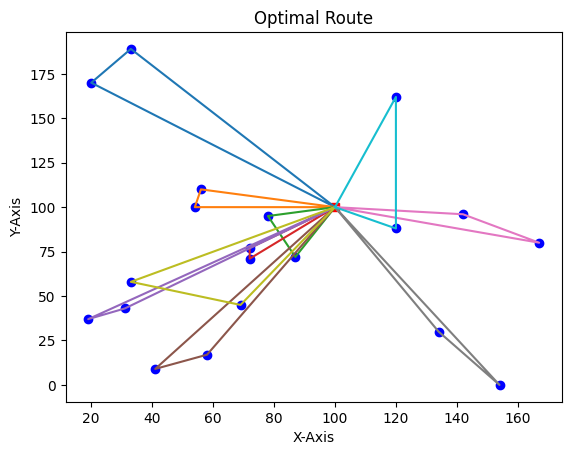

Total time taken to Execute: 32.59 seconds


In [41]:
#The data like num of locations, coordinates of the locations, depot Coordinates, no of vehicles

num_locations=20
locations=[(random.randint(0,200),random.randint(0,200)) for i in range(num_locations)]
depot=(100,100)
num_vehicles=10


#GenAlgo SetUp
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))   #definfing the fitness function
creator.create("Individual", list, fitness=creator.FitnessMin)    #Individuals are the list with fitness Attribute

#individual and Population Setup
toolbox=base.Toolbox()
toolbox.register("indices",random.sample,range(num_locations), num_locations) # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate,creator.Individual,toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat,list, toolbox.individual)   # Function to create a population of individuals

#Now the Fintess Function to Evaluate the fitness
def Eval(individual):
    total_dis=0
    route_distances=[]    # Track distance traveled by each vehicle for balance calculation
    for i in range(num_vehicles):
        vehicle_route_cords=[depot]
        for j in range(i, len(individual),num_vehicles):
            customer_index=individual[j]
            vehicle_route_cords.append(locations[customer_index])
        vehicle_route_cords.append(depot)
        current_distance=0
        for k in range(len(vehicle_route_cords)-1):
            point_A=vehicle_route_cords[k]
            point_B=vehicle_route_cords[k+1]     # Calculate total distance traveled by this vehicle
            distance=np.linalg.norm(np.array(point_A)-np.array(point_B))
            current_distance+=distance
            
        total_dis+=current_distance
        route_distances.append(current_distance)
    balanced_penalty=np.std(route_distances)    # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_dis,balanced_penalty

toolbox.register("evaluate",Eval)                                #Register the evaluation function
toolbox.register("mate",tools.cxPartialyMatched)                  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate",tools.mutShuffleIndexes,indpb=0.5)     #Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select",tools.selTournament,tournsize=3)       #Register the Selection function using Tournamnent selection

#plotting the Routes

def plot_route(individual, title="Routes"):
    plt.figure()
    for(x,y) in locations:
        plt.plot(x,y,'bo')
    plt.plot(depot[0],depot[1],'rs')

    for i in range(num_vehicles):
        vehicle_route=[depot]+[locations[individual[j]] for j in range(i, len(individual) , num_vehicles)]+[depot]
        plt.plot(*zip(*vehicle_route),'-')
    plt.title(title)
    plt.xlabel('X-Axis')
    plt.ylabel('Y-Axis')
    plt.show()

    
# Running the Genetic Algorithm
def main():
    start_time=time.perf_counter() #start time
    
    random.seed(42)
    pop=toolbox.population(n=500)
    hof=tools.HallOfFame(1)
    
    # Setup statistics to track
    stats=tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg",np.mean)    #Calculating the Average Fitness of the entire population 
    stats.register("min",np.min)     #Calculating the Minimum Fitness of the entire population
    

    #Run the GenAlgo
    algorithms.eaSimple(pop,toolbox,0.7,0.2,500,stats=stats,halloffame=hof)

    #Printing thee Optimal Sequence for the vehicles to travel
    
    print("\n-----Optimal Route Sequences-----")
    best_individual = hof[0]
    for i in range(num_vehicles):
        customer_nodes = best_individual[i::num_vehicles]
        route_sequence = "Depot -> " + " -> ".join(map(str, customer_nodes)) + " -> Depot"
        print(f"Vehicle {i}: {route_sequence}")
    print("-------------------------------------\n")

    #plot the best Route
    plot_route(hof[0],"Optimal Route")
    end_time=time.perf_counter()
    
    exe_time=end_time-start_time
    print(f"Total time taken to Execute: {exe_time:.2f} seconds")
    
    return pop,stats,hof
    
if __name__ == "__main__":
    main()
    
    